# Optimization Lab 4 - 161108

In [1]:
%pylab inline
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Import each data set as a numpy array

d1 = np.loadtxt('./Anscombe/data_set1.txt')
d2 = np.loadtxt('./Anscombe/data_set2.txt')
d3 = np.loadtxt('./Anscombe/data_set3.txt')
d4 = np.loadtxt('./Anscombe/data_set4.txt')

## 2 Least squares

#### 1) Graph each of the datasets and see how the samples are distributed. Mak- ing a plot of the dataset is commonly an important step to visually analyze the samples. You are recommended to perform it previous to any auto- matic analysis.

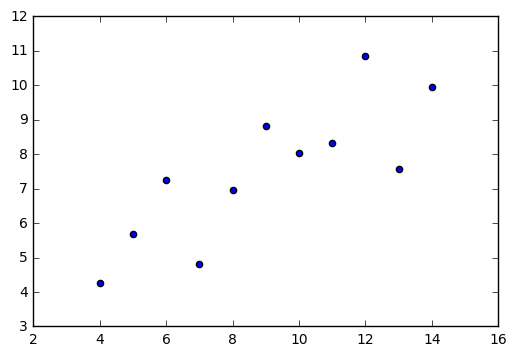

In [3]:
plt.scatter(d1[:,0:1],d1[:,1:2])

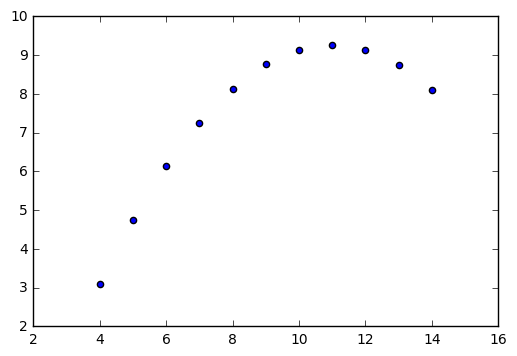

In [4]:
plt.scatter(d2[:,0:1],d2[:,1:2])

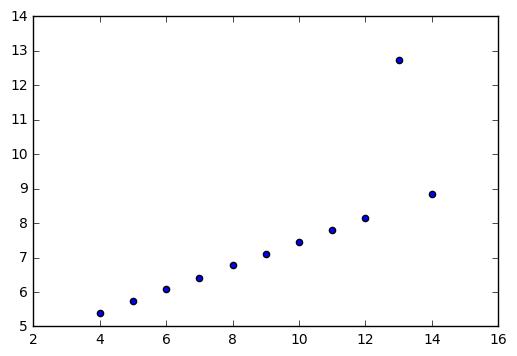

In [5]:
plt.scatter(d3[:,0:1],d3[:,1:2])

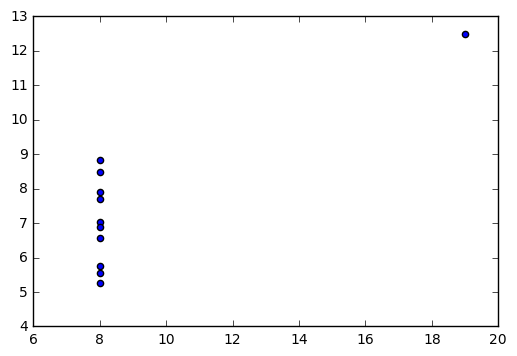

In [6]:
plt.scatter(d4[:,0:1],d4[:,1:2])

#### 2) For each of the dataset, compute the parameters (b0 , b1 )T using the least squares method. For that purpose you may use the closed solution. Plot the obtained line and see if it correctly fits the dataset. You will see that the least squares method is sensible to outliers. An outlier is a sample that markedly deviates from the other observations in the set.

The error found during the computations below using the simple least squares (LS) methodology was the smallest out of the three methodologies. However, this was the methodology most prone towards outliers.

In [7]:
# Set up X and Y variables for all data sets

X1 = d1[:,0:1]
Y1 = d1[:,1:2]

X2 = d2[:,0:1]
Y2 = d2[:,1:2]

X3 = d3[:,0:1]
Y3 = d3[:,1:2]

X4 = d4[:,0:1]
Y4 = d4[:,1:2]

In [8]:
# Create A matrices

A1 = concatenate((X1,np.ones(X1.shape)),axis=1)
A2 = concatenate((X2,np.ones(X2.shape)),axis=1)
A3 = concatenate((X3,np.ones(X3.shape)),axis=1)
A4 = concatenate((X4,np.ones(X4.shape)),axis=1)

In [9]:
# Calculate b-vector
b1 = np.dot(np.linalg.inv(np.dot(A1.T, A1)), np.dot(A1.T, Y1))
b2 = np.dot(np.linalg.inv(np.dot(A2.T, A2)), np.dot(A2.T, Y2))
b3 = np.dot(np.linalg.inv(np.dot(A3.T, A3)), np.dot(A3.T, Y3))
b4 = np.dot(np.linalg.inv(np.dot(A4.T, A4)), np.dot(A4.T, Y4))

In [10]:
# Calculate error

e1 = np.dot(A1,b1) - Y1
e2 = np.dot(A2,b2) - Y2
e3 = np.dot(A3,b3) - Y3
e4 = np.dot(A4,b4) - Y4

The error of the 1st dataset using the LS function is: 1.56e-13


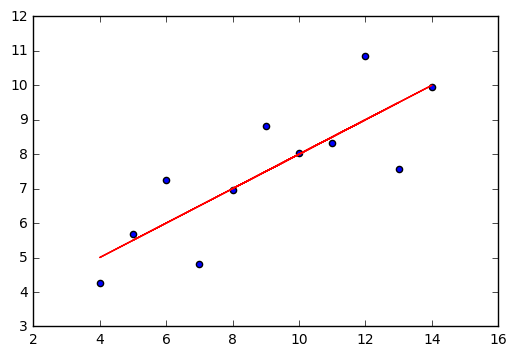

In [11]:
# Plot X1, Y1

fig, ax = plt.subplots()
ax.plot(X1, np.dot(A1,b1), color='red')
ax.scatter(X1, Y1)

print "The error of the 1st dataset using the LS function is: {:.2e}".format(sum(e1))

The error of the 2nd dataset using the LS function is: 1.66e-13


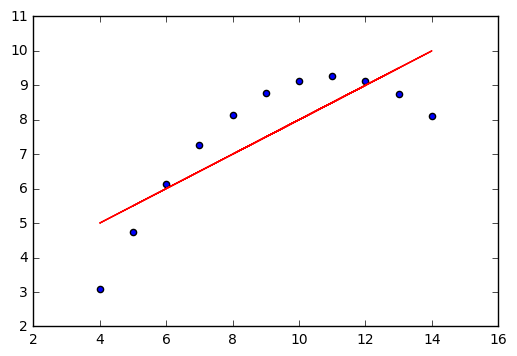

In [12]:
# Plot X2, Y2

fig, ax = plt.subplots()
ax.plot(X2, np.dot(A2,b2), color='red')
ax.scatter(X2, Y2)

print "The error of the 2nd dataset using the LS function is: {:.2e}".format(sum(e2))

The error of the 3rd dataset using the LS function is: 8.79e-14


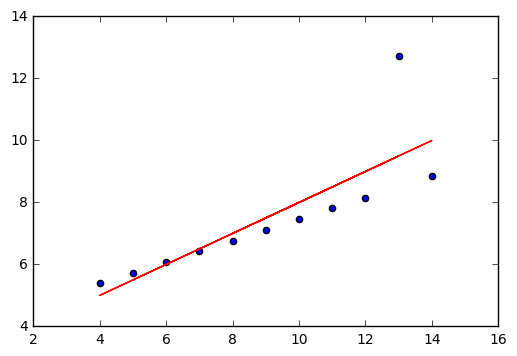

In [13]:
# Plot X3, Y3

fig, ax = plt.subplots()
ax.plot(X3, np.dot(A3,b3), color='red')
ax.scatter(X3, Y3)

print "The error of the 3rd dataset using the LS function is: {:.2e}".format(sum(e3))

The error of the 4th dataset using the LS function is: 6.93e-14


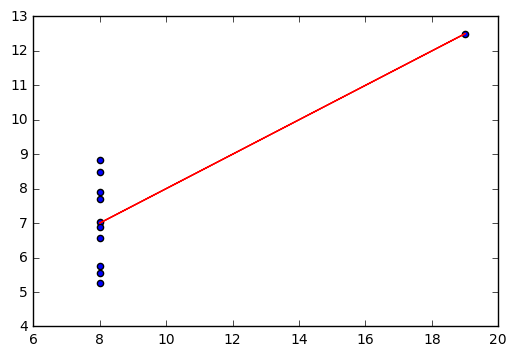

In [14]:
# Plot X4, Y4

fig, ax = plt.subplots()
ax.plot(X4, np.dot(A4,b4), color='red')
ax.scatter(X4, Y4)

print "The error of the 4th dataset using the LS function is: {:.2e}".format(sum(e4))

## 3 Robust functions

#### 1 Plot the least squares function, ρ(u) = 1 u2, and compare it with the Huber function, equation (2), in order to see the “importance” that is given to each prediction error u. You may, for instance, plot the function ρ(u) for |u| ≤ 10.

The error using LS is much more prone to correct towards outliers than the Huber methodology.

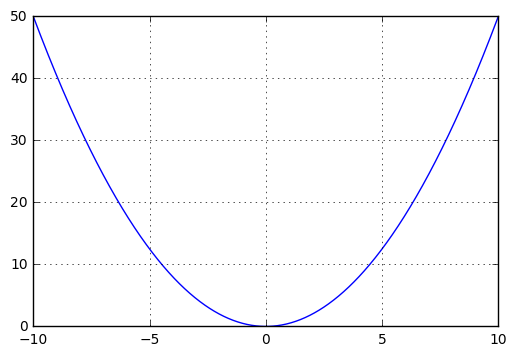

In [15]:
# Least squares function

u = linspace(-10, 10, 1000)

ro = u**2/2

plot(u, ro)
grid(True)

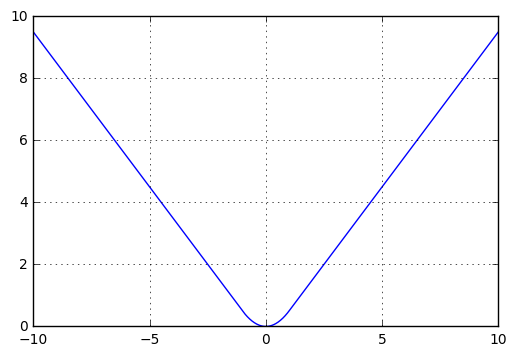

In [16]:
# Huber function

c = 1

ro = (abs(u) <= c) * u**2/2 + (abs(u) > c) * c*(2*abs(u) - c)/2

plot(u, ro)
grid(True)

#### 2 Compute the parameters (b0,b1)T using the Huber function. For that issue you will need to use the Newton method (recall that you’ll need to use the gradient method if the Hessian is not positive definite). Plot the obtained line and and compare the result with the result you obtained with the least squares method.

In [29]:
# function to minimize

def Q(B):
    
    A = A4
    Y = Y4
    c = 1
    
    e = np.dot(A,B) - Y
    
    return (abs(e) <= c)*(1/2)*np.power(e,2) + (abs(e) > c)*(1/2)*c*(2*abs(e) - c)

In [30]:
# gradient functions

def dQ(B):
    
    A = A4
    X = X4
    Y = Y4
    c = 1
    
    e = np.dot(A,B) - Y
    
    db0 = np.sum((abs(e) <= c)*e + (abs(e) > c)*np.sign(e)*c)
    db1 = np.sum((abs(e) <= c)*np.multiply(e,X) + (abs(e) > c)*np.sign(e)*c*X)
    return np.array([[db0],[db1]])

In [31]:
B = np.array([[0],[1]])
alpha = 1.

for i in range(0,100):
    alpha = 1.
    if alpha > 1e-5:
        while np.sum(Q(B)) < np.sum(Q(B - alpha*dQ(B))):
            alpha = alpha/2
        B = B - alpha*dQ(B)

print alpha

1.38777878078e-17


The error of the 1st dataset using the LS function is: 1.56e-13
The error of the 1st dataset using the Huber function is: 6.63e+00


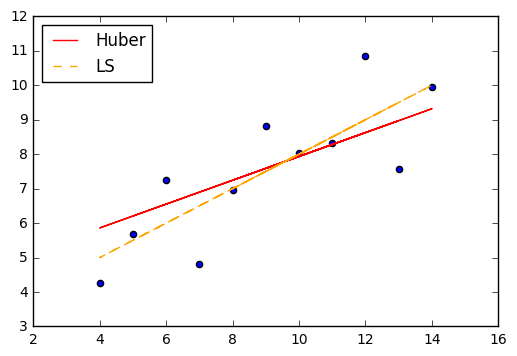

In [20]:
# Plot X1, Y1

bH1 = B        
eH1 = Q(B)

fig, ax = plt.subplots()
ax.plot(X1, np.dot(A1,bH1), color='red', label='Huber')
ax.plot(X1, np.dot(A1,b1), color='orange', label='LS', linestyle='--')
legend = ax.legend(loc='upper left')
ax.scatter(X1, Y1)

print "The error of the 1st dataset using the LS function is: {:.2e}".format(sum(e1))
print "The error of the 1st dataset using the Huber function is: {:.2e}".format(sum(eH1))

The error of the 2nd dataset using the LS function is: 1.66e-13
The error of the 2nd dataset using the Huber function is: 6.30e+00


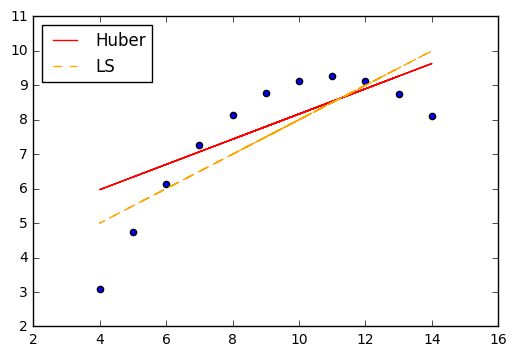

In [24]:
# Plot X2, Y2

bH2 = B        
eH2 = Q(B)

fig, ax = plt.subplots()
ax.plot(X2, np.dot(A2,bH2), color='red', label='Huber')
ax.plot(X2, np.dot(A2,b2), color='orange', label='LS', linestyle='--')
legend = ax.legend(loc='upper left')
ax.scatter(X2, Y2)

print "The error of the 2nd dataset using the LS function is: {:.2e}".format(sum(e2))
print "The error of the 2nd dataset using the Huber function is: {:.2e}".format(sum(eH2))

The error of the 3rd dataset using the LS function is: 8.79e-14
The error of the 3rd dataset using the Huber function is: 3.70e+00


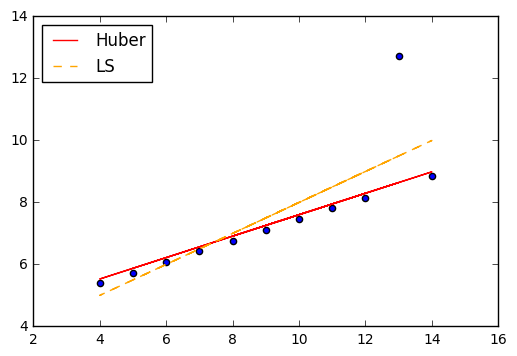

In [28]:
# Plot X3, Y3

bH3 = B        
eH3 = Q(B)

fig, ax = plt.subplots()
ax.plot(X3, np.dot(A3,bH3), color='red', label='Huber')
ax.plot(X3, np.dot(A3,b3), color='orange', label='LS', linestyle='--')
legend = ax.legend(loc='upper left')
ax.scatter(X3, Y3)

print "The error of the 3rd dataset using the LS function is: {:.2e}".format(sum(e3))
print "The error of the 3rd dataset using the Huber function is: {:.2e}".format(sum(eH3))

The error of the 4th dataset using the LS function is: 6.93e-14
The error of the 4th dataset using the Huber function is: 6.94e+00


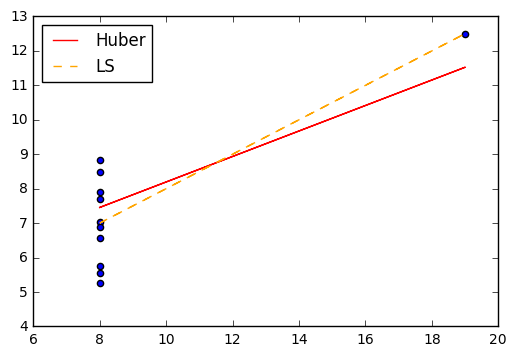

In [32]:
# Plot X4, Y4

bH4 = B        
eH4 = Q(B)

fig, ax = plt.subplots()
ax.plot(X4, np.dot(A4,bH4), color='red', label='Huber')
ax.plot(X4, np.dot(A4,b4), color='orange', label='LS', linestyle='--')
legend = ax.legend(loc='upper left')
ax.scatter(X4, Y4)

print "The error of the 4th dataset using the LS function is: {:.2e}".format(sum(e4))
print "The error of the 4th dataset using the Huber function is: {:.2e}".format(sum(eH4))

#### 3 If you want to perform more experiments, you may use other robust func- tions such as the Cauchy function, b2    u 2  ρ(u)=2log1+ b. The latter function is even more robust to outliers than the Huber func- tion.

In [46]:
# function to minimize

def Q(B):
    
    A = A4
    Y = Y4
    b = 1
    
    e = np.dot(A,B) - Y
    
    return (1/2)*b**2*log(1 + (np.sum(e)/b)**2)

In [47]:
# gradient functions

def dQ(B):
    
    A = A4
    X = X4
    Y = Y4
    b = 1
    
    e = np.dot(A,B) - Y
    
    db0 = np.sum((b**2*e)/(b**2 + e**2))
    db1 = np.sum((b**2*e*X)/(b**2 + e**2))
    return np.array([[db0],[db1]])

In [48]:
B = np.array([[0],[1]])
alpha = 1.

for i in range(0,100):
    alpha = 1.
    if alpha > 1e-5:
        while np.sum(Q(B)) < np.sum(Q(B - alpha*dQ(B))):
            alpha = alpha/2
        B = B - alpha*dQ(B)

print alpha

8.881784197e-16


The error of the 1st dataset using the LS function is: 1.56e-13
The error of the 1st dataset using the Huber function is: 6.63e+00
The error of the 1st dataset using the Cauchy function is: 1.25e-01


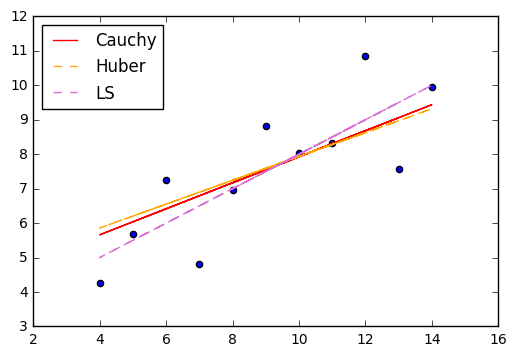

In [36]:
# Plot X1, Y1

bC1 = B        
eC1 = Q(B)

fig, ax = plt.subplots()
ax.plot(X1, np.dot(A1,bC1), color='red', label='Cauchy')
ax.plot(X1, np.dot(A1,bH1), color='orange', label='Huber', linestyle='--')
ax.plot(X1, np.dot(A1,b1), color='orchid', label='LS', linestyle='--')
legend = ax.legend(loc='upper left')
ax.scatter(X1, Y1)

print "The error of the 1st dataset using the LS function is: {:.2e}".format(sum(e1))
print "The error of the 1st dataset using the Huber function is: {:.2e}".format(sum(eH1))
print "The error of the 1st dataset using the Cauchy function is: {:.2e}".format(sum(eC1))

The error of the 2nd dataset using the LS function is: 1.66e-13
The error of the 2nd dataset using the Huber function is: 6.30e+00
The error of the 2nd dataset using the Cauchy function is: 9.08e-01


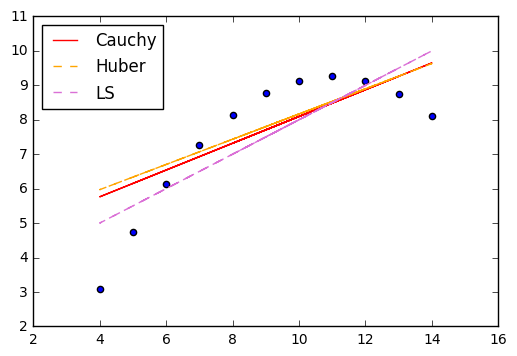

In [41]:
# Plot X2, Y2

bC2 = B        
eC2 = Q(B)

fig, ax = plt.subplots()
ax.plot(X2, np.dot(A2,bC2), color='red', label='Cauchy')
ax.plot(X2, np.dot(A2,bH2), color='orange', label='Huber', linestyle='--')
ax.plot(X2, np.dot(A2,b2), color='orchid', label='LS', linestyle='--')
legend = ax.legend(loc='upper left')
ax.scatter(X2, Y2)

print "The error of the 2nd dataset using the LS function is: {:.2e}".format(sum(e2))
print "The error of the 2nd dataset using the Huber function is: {:.2e}".format(sum(eH2))
print "The error of the 2nd dataset using the Cauchy function is: {:.2e}".format(sum(eC2))

The error of the 3rd dataset using the LS function is: 8.79e-14
The error of the 3rd dataset using the Huber function is: 3.70e+00
The error of the 3rd dataset using the Cauchy function is: 2.70e-02


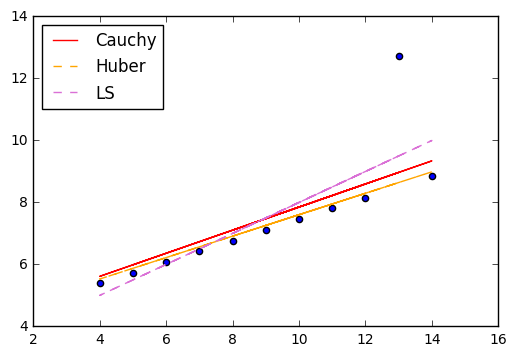

In [45]:
# Plot X3, Y3

bC3 = B        
eC3 = Q(B)

fig, ax = plt.subplots()
ax.plot(X3, np.dot(A3,bC3), color='red', label='Cauchy')
ax.plot(X3, np.dot(A3,bH3), color='orange', label='Huber', linestyle='--')
ax.plot(X3, np.dot(A3,b3), color='orchid', label='LS', linestyle='--')
legend = ax.legend(loc='upper left')
ax.scatter(X3, Y3)

print "The error of the 3rd dataset using the LS function is: {:.2e}".format(sum(e3))
print "The error of the 3rd dataset using the Huber function is: {:.2e}".format(sum(eH3))
print "The error of the 3rd dataset using the Cauchy function is: {:.2e}".format(sum(eC3))

The error of the 4th dataset using the LS function is: 6.93e-14
The error of the 4th dataset using the Huber function is: 6.94e+00
The error of the 4th dataset using the Cauchy function is: 1.16e+00


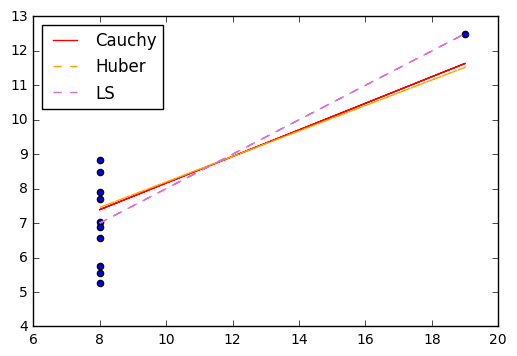

In [49]:
# Plot X4, Y4

bC4 = B        
eC4 = Q(B)

fig, ax = plt.subplots()
ax.plot(X4, np.dot(A4,bC4), color='red', label='Cauchy')
ax.plot(X4, np.dot(A4,bH4), color='orange', label='Huber', linestyle='--')
ax.plot(X4, np.dot(A4,b4), color='orchid', label='LS', linestyle='--')
legend = ax.legend(loc='upper left')
ax.scatter(X4, Y4)

print "The error of the 4th dataset using the LS function is: {:.2e}".format(sum(e4))
print "The error of the 4th dataset using the Huber function is: {:.2e}".format(sum(eH4))
print "The error of the 4th dataset using the Cauchy function is: {:.2e}".format(sum(eC4))

Overall, the Cauchy method for measuring error is the middle-ground between the LS and Huber methodologies. Although the outlier in dataset 4 is not ignored using any of the three methodologies, the other three data sets have excellent fits using any of these three methodologies. Overall, the error is minimized using the least squares method.